In [1]:
import symmetric_src as src

In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
# read in our data
fp = 'data_ingestion.csv'
df = pd.read_csv(fp)

In [4]:
df.head()

,Unnamed: 0,Name,URL,Phone,Latitude,Longitude,Address,City,State,ZIP,...,Vertical2,Vertical3,Reviews,polarity,subjectivity,Word1,Word2,Word3,Word4,Word5
0,0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,1.858875e+10,32.810650,-117.116113,3755 Murphy Canyon Rd,San Diego,CA,92123,...,None,None,during this stay at home order weve been order...,0.240909,0.387879,week,grab,italian,restaurant,decided
1,1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,1.619239e+10,32.722356,-117.168111,1609 India St,San Diego,CA,92101,...,None,None,due to the whole pandemic we decided to try a ...,0.080570,0.469777,cozy,place,little,appetito,di
2,2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,1.619381e+10,32.721302,-117.130202,3001 Beech St,San Diego,CA,92102,...,Italian,None,lockdown hoursmonthurs sat closes at sun clos...,0.309259,0.516667,close,pizza,meal,pandemic,option
3,3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,1.619265e+10,32.760617,-117.068064,6011 El Cajon Blvd,San Diego,CA,92115,...,Italian,None,omg the meatball covid special is worth ittoo ...,0.399351,0.412143,delivery,food,italian,area,meatball
4,4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,1.619233e+10,32.723750,-117.168130,1747 India St,San Diego,CA,92101,...,Pizza,Bars,been here so many times time for a local revie...,0.118750,0.306250,pizza,marinara,time,person,light


## A Matrix

 55%|█████▍    | 17657/32291 [00:00<00:00, 176565.96it/s]

(199, 199)


100%|██████████| 32291/32291 [00:00<00:00, 167127.89it/s]


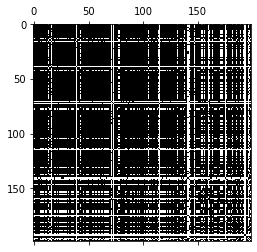

In [5]:
A_tuples = src.data_to_A_matrix(df)
A_matrix = src.A_matrix_func(df, A_tuples)
plt.spy(A_matrix.toarray())

## P Matrix

100%|██████████| 6039/6039 [00:00<00:00, 219741.66it/s]

(199, 199)


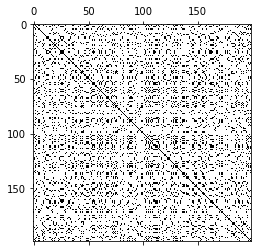

In [6]:
P_matrix = src.data_to_P_matrix(df)
P_matrix = src.P_matrix_func(df, P_matrix)
plt.spy(P_matrix.toarray())

## S Matrix

  0%|          | 0/5729 [00:00<?, ?it/s]

(199, 199)


100%|██████████| 5729/5729 [00:00<00:00, 217468.37it/s]


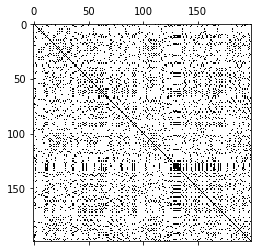

In [7]:
S_matrix = src.data_to_S_matrix(df)
S_matrix = src.S_matrix_func(df, S_matrix)
plt.spy(S_matrix.toarray())

## D Matrix

100%|██████████| 8671/8671 [00:00<00:00, 132994.02it/s]


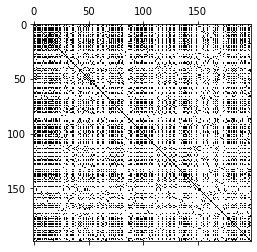

In [8]:
D_matrix = src.data_to_D_matrix(df)
D_matrix = src.D_matrix_func(df, D_matrix)
plt.spy(D_matrix.toarray())

## R Matrix

100%|██████████| 1879/1879 [00:00<00:00, 75372.48it/s]


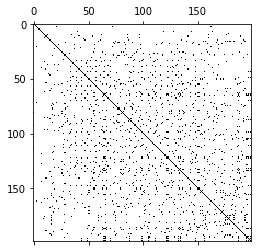

In [9]:
R_matrix = src.data_to_R_matrix(df)
R_matrix = src.R_matrix_func(df, R_matrix)
plt.spy(R_matrix.toarray())

## W Matrix

100%|██████████| 813/813 [00:00<00:00, 226410.54it/s]


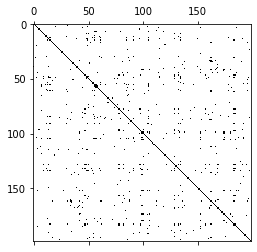

In [10]:
W_matrix = src.data_to_W_matrix(df)
W_matrix = src.W_matrix_func(df, W_matrix)
plt.spy(W_matrix.toarray())

# PathSim

In [11]:
import sys
!{sys.executable} -m pip install pysclump --user

In [12]:
from pysclump import PathSim

In [13]:
labels = (df[['Yelp ID']].values).tolist()
flat_labels = [y for x in labels for y in x]
flat_labels[:10]

['AlO78to1upUkVhRx12XtVA',
 '7PGyWA51sSdw8M4fBXa9Gw',
 'n3sKOKoEk_gKhBvgfIwZaA',
 '4GT1sQ_pcKk4gBMrJddexw',
 'PzGU5brzhsVqumdU4qE5Rw',
 'aY_z6z6at7wyoW7sFhf4bA',
 '9z2faUubEPjEEpV1zyxH6g',
 'djfc2SAzd4xjn5HmUp8wow',
 'W0dzJ7E6R3kyAOXIlO_tbw',
 'Bne55NwL25KO_ntMgflb_A']

In [14]:
type_lists = {
    'C': flat_labels,
    'A': flat_labels,
}

incidence_matrices = {
    'AC': A_matrix.toarray(),
    'RC': R_matrix.toarray(),
    'PC': P_matrix.toarray(),
    'SC': S_matrix.toarray(),
    'DC': D_matrix.toarray(),
    'RC': R_matrix.toarray(),
    'WC': W_matrix.toarray()
}

In [15]:
# Create PathSim instance.
ps = PathSim(type_lists, incidence_matrices)

In [16]:
df['Yelp ID'].head()

0    AlO78to1upUkVhRx12XtVA
1    7PGyWA51sSdw8M4fBXa9Gw
2    n3sKOKoEk_gKhBvgfIwZaA
3    4GT1sQ_pcKk4gBMrJddexw
4    PzGU5brzhsVqumdU4qE5Rw
Name: Yelp ID, dtype: object

# Single Metapaths 

## A matrix only 

In [17]:
# Get the similarity between two authors (indicated by type 'A').
# ps.pathsim('AlO78to1upUkVhRx12XtVA', 'n3sKOKoEk_gKhBvgfIwZaA', metapath='CAC')

In [18]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CAC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [19]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,4.0,2291
8,Ristorante Illando,https://www.yelp.com/biz/ristorante-illando-sa...,4.5,974
9,Pomodoro Ristorante Italiano,https://www.yelp.com/biz/pomodoro-ristorante-i...,4.5,923
11,Salvatore's Cucina Italiana,https://www.yelp.com/biz/salvatores-cucina-ita...,4.5,765
15,Volare,https://www.yelp.com/biz/volare-san-diego?adju...,4.0,651
20,Arrivederci Ristorante,https://www.yelp.com/biz/arrivederci-ristorant...,4.0,1375
24,Piacere Mio - South Park,https://www.yelp.com/biz/piacere-mio-south-par...,4.5,1083
25,Devine Pastabilities,https://www.yelp.com/biz/devine-pastabilities-...,4.5,1565
28,Ciccia Osteria,https://www.yelp.com/biz/ciccia-osteria-san-di...,4.5,210


## P Matrix only

In [20]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CPC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [21]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
38,Filippi's Pizza Grotto Kearny Mesa,https://www.yelp.com/biz/filippis-pizza-grotto...,3.5,599
67,CUCINA sorella,https://www.yelp.com/biz/cucina-sorella-san-di...,4.0,381
99,Little Italy Pizzeria,https://www.yelp.com/biz/little-italy-pizzeria...,3.5,260
107,Davanti Enoteca - Del Mar,https://www.yelp.com/biz/davanti-enoteca-del-m...,3.5,694
126,Piazza 1909,https://www.yelp.com/biz/piazza-1909-la-jolla?...,4.5,363
140,Dough Nations,https://www.yelp.com/biz/dough-nations-san-die...,4.5,99
149,The Red Door,https://www.yelp.com/biz/the-red-door-san-dieg...,4.0,1044
155,Mattarello Cooking Lab,https://www.yelp.com/biz/mattarello-cooking-la...,4.0,94
185,Isola Pizza Bar,https://www.yelp.com/biz/isola-pizza-bar-san-d...,4.0,1054


## S Matrix only

In [22]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CSC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [23]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
8,Ristorante Illando,https://www.yelp.com/biz/ristorante-illando-sa...,4.5,974
14,Barbusa,https://www.yelp.com/biz/barbusa-san-diego?adj...,4.0,2006
39,Sicilia Bella,https://www.yelp.com/biz/sicilia-bella-san-die...,5.0,282
44,Gaetano's,https://www.yelp.com/biz/gaetanos-san-diego?ad...,3.5,272
121,Sisters Pizza,https://www.yelp.com/biz/sisters-pizza-san-die...,4.5,241
153,Long Island Mike's Pizza,https://www.yelp.com/biz/long-island-mikes-piz...,4.0,542
155,Mattarello Cooking Lab,https://www.yelp.com/biz/mattarello-cooking-la...,4.0,94
186,Filippi's Pizza Grotto Santee,https://www.yelp.com/biz/filippis-pizza-grotto...,3.5,385
190,Alfredo’s Pizzeria,https://www.yelp.com/biz/alfredo-s-pizzeria-sa...,4.0,321


## D Matrix only

In [24]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CDC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [25]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
44,Gaetano's,https://www.yelp.com/biz/gaetanos-san-diego?ad...,3.5,272
62,Filippi's Pizza Grotto Mission Gorge,https://www.yelp.com/biz/filippis-pizza-grotto...,3.5,494
66,Bistro Kaz,https://www.yelp.com/biz/bistro-kaz-san-diego?...,4.0,232
153,Long Island Mike's Pizza,https://www.yelp.com/biz/long-island-mikes-piz...,4.0,542
161,Brothers' Giant Pizza,https://www.yelp.com/biz/brothers-giant-pizza-...,4.0,219
165,Mangia Mangia Mobile,https://www.yelp.com/biz/mangia-mangia-mobile-...,4.5,208
182,Little Sam's Pizza,https://www.yelp.com/biz/little-sams-pizza-san...,4.0,222
184,Rosa's PIZZA,https://www.yelp.com/biz/rosas-pizza-san-diego...,4.0,136
198,DeMi Café Café,https://www.yelp.com/biz/demi-caf%C3%A9-caf%C3...,4.5,248


## R matrix only 

In [26]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CRC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [27]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
38,Filippi's Pizza Grotto Kearny Mesa,https://www.yelp.com/biz/filippis-pizza-grotto...,3.5,599
60,Italianissimo Trattoria,https://www.yelp.com/biz/italianissimo-trattor...,4.5,592
81,Pizza Bella,https://www.yelp.com/biz/pizza-bella-san-diego...,4.0,568
92,Olive Garden - Carside Pickup Available,https://www.yelp.com/biz/olive-garden-carside-...,3.5,536
93,Leucadia Pizzeria & Italian Restaurant,https://www.yelp.com/biz/leucadia-pizzeria-and...,3.5,559
103,de'Medici,https://www.yelp.com/biz/demedici-san-diego?ad...,4.0,575
113,Osteria Romantica,https://www.yelp.com/biz/osteria-romantica-la-...,4.0,555
138,Pizza e Birra,https://www.yelp.com/biz/pizza-e-birra-san-die...,4.5,584
139,Florence Ristorante Pizza - North Park,https://www.yelp.com/biz/florence-ristorante-p...,3.5,540


## W Matrix only

In [28]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CWC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [29]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,4.0,2291
2,Buona Forchetta,https://www.yelp.com/biz/buona-forchetta-san-d...,4.5,2420
3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,4.5,1218
4,Filippi's Pizza Grotto Little Italy,https://www.yelp.com/biz/filippis-pizza-grotto...,4.0,2822
5,CUCINA urbana,https://www.yelp.com/biz/cucina-urbana-san-die...,4.5,3967
14,Barbusa,https://www.yelp.com/biz/barbusa-san-diego?adj...,4.0,2006
39,Sicilia Bella,https://www.yelp.com/biz/sicilia-bella-san-die...,5.0,282
40,Antica Trattoria,https://www.yelp.com/biz/antica-trattoria-la-m...,4.5,836
150,Cafe Milano,https://www.yelp.com/biz/cafe-milano-la-jolla?...,4.5,381


# Multiple Metapaths 

In [30]:
# class PathSim:
#     def __init__(self, type_lists, incidence_matrices):
#         self.node_types = type_lists
#         self.node_type_indices = {node: index for type_list in type_lists.values() for index, node in enumerate(type_list)}
#         self.incidence_matrices = incidence_matrices
#         self.fill_incidence_matrices()
#         self.similarity_matrices = {}
    
#     # Transpose for the reversed incidence type.
#     def fill_incidence_matrices(self):
#         initial_matrices = self.incidence_matrices.copy()
#         for incidence_type in initial_matrices.keys():
#             self.incidence_matrices[incidence_type[::-1]] = self.incidence_matrices[incidence_type].T

#     # Find similarities between node1 and node2.
#     def pathsim(self, node1, node2, metapath):
                    
#         if metapath not in self.similarity_matrices:
#             self.compute_similarity_matrix(metapath)
        
#         try:
#             return self.similarity_matrices[metapath][self.node_type_indices[node1]][self.node_type_indices[node2]]
#         except ValueError:
#             raise ValueError('Invalid node types for given metapath.')
        
#     # Computes the similarity matrix by iterating over all pairs of nodes.
#     def compute_similarity_matrix(self, metapath):

#         # Compute metapath matrix.
#         metapath_matrix = self.compute_metapath_matrix(metapath)

#         # Fill in similarity matrix entries now.
#         num_nodes = len(self.node_types[metapath[0]])
#         similarity_matrix = np.eye(num_nodes, num_nodes)

#         for (index1, index2) in product(range(num_nodes), range(num_nodes)):
#             if index1 != index2:
#                 num_paths_12 = metapath_matrix[index1][index2]
#                 num_paths_11 = metapath_matrix[index1][index1]
#                 num_paths_22 = metapath_matrix[index2][index2]

#                 if (num_paths_11 + num_paths_22) > 0:
#                     similarity_matrix[index1][index2] = (2 * num_paths_12)/(num_paths_11 + num_paths_22)
#                 else:
#                     similarity_matrix[index1][index2] = 0
        
#         self.similarity_matrices[metapath] = similarity_matrix
#         return similarity_matrix

#     # Computes the number of paths via this metapath.
#     def compute_metapath_matrix(self, metapath):

#         # We only support symmetric metapaths, for now.
#         if not PathSim.symmetric(metapath):
#             raise ValueError('Only symmetric metapaths supported.')
            
#         curr_matrix = np.eye(len(self.node_types[metapath[0]]))
#         metapath_length = len(metapath)

#         for node_type, next_node_type in zip(metapath[:metapath_length//2], metapath[1:metapath_length//2 + 1]):
            
#             incidence_type = node_type + next_node_type

#             if incidence_type not in self.incidence_matrices.keys():
#                 raise ValueError('Invalid incidence %s.' % incidence_type)

#             curr_matrix = np.matmul(curr_matrix, self.incidence_matrices[incidence_type])

#         return np.matmul(curr_matrix, curr_matrix.T)

#     # Check if metapath is symmetric. 
#     @staticmethod
#     def symmetric(metapath):
#         metapath_length = len(metapath)
#         for index, node_type in enumerate(metapath[:metapath_length//2]):
        
#             other_index = metapath_length - index - 1
#             other_node_type = metapath[other_index]

#             if other_node_type != node_type:
#                 print(other_node_type, node_type)
#                 return False

#         return True

## A Matrix and P Matrix

In [31]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CACPCAC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [32]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,4.0,2291
8,Ristorante Illando,https://www.yelp.com/biz/ristorante-illando-sa...,4.5,974
9,Pomodoro Ristorante Italiano,https://www.yelp.com/biz/pomodoro-ristorante-i...,4.5,923
11,Salvatore's Cucina Italiana,https://www.yelp.com/biz/salvatores-cucina-ita...,4.5,765
15,Volare,https://www.yelp.com/biz/volare-san-diego?adju...,4.0,651
20,Arrivederci Ristorante,https://www.yelp.com/biz/arrivederci-ristorant...,4.0,1375
24,Piacere Mio - South Park,https://www.yelp.com/biz/piacere-mio-south-par...,4.5,1083
25,Devine Pastabilities,https://www.yelp.com/biz/devine-pastabilities-...,4.5,1565
28,Ciccia Osteria,https://www.yelp.com/biz/ciccia-osteria-san-di...,4.5,210


## A Matrix and R Matrix

In [33]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CACRCAC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [34]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
1,Buon Appetito,https://www.yelp.com/biz/buon-appetito-san-die...,4.0,2291
8,Ristorante Illando,https://www.yelp.com/biz/ristorante-illando-sa...,4.5,974
9,Pomodoro Ristorante Italiano,https://www.yelp.com/biz/pomodoro-ristorante-i...,4.5,923
11,Salvatore's Cucina Italiana,https://www.yelp.com/biz/salvatores-cucina-ita...,4.5,765
15,Volare,https://www.yelp.com/biz/volare-san-diego?adju...,4.0,651
20,Arrivederci Ristorante,https://www.yelp.com/biz/arrivederci-ristorant...,4.0,1375
24,Piacere Mio - South Park,https://www.yelp.com/biz/piacere-mio-south-par...,4.5,1083
25,Devine Pastabilities,https://www.yelp.com/biz/devine-pastabilities-...,4.5,1565
28,Ciccia Osteria,https://www.yelp.com/biz/ciccia-osteria-san-di...,4.5,210


## All Matrices Except A

In [35]:
# Now we have to see which restaurant
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= 'CWCRCDCSCDCRCWC')
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

In [36]:
# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
23,Pastalini,https://www.yelp.com/biz/pastalini-san-diego?a...,4.0,425
24,Piacere Mio - South Park,https://www.yelp.com/biz/piacere-mio-south-par...,4.5,1083
32,Piatti,https://www.yelp.com/biz/piatti-la-jolla-2?adj...,4.5,1629
52,Sardina's Italian Restaurant,https://www.yelp.com/biz/sardinas-italian-rest...,3.5,295
64,Nonna,https://www.yelp.com/biz/nonna-san-diego-5?adj...,4.0,248
101,Roma Mia,https://www.yelp.com/biz/roma-mia-san-diego?ad...,4.5,140
147,Candor by Giuseppe,https://www.yelp.com/biz/candor-by-giuseppe-la...,4.5,40
176,The Haven Pizzeria,https://www.yelp.com/biz/the-haven-pizzeria-sa...,4.0,502
182,Little Sam's Pizza,https://www.yelp.com/biz/little-sams-pizza-san...,4.0,222


## A and D Matrix Metapath

Explantion of combined metapath... 

In [37]:
metapath = 'CDCACDC'

In [38]:
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= metapath)
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
3,Pesto Italian Craft Kitchen,https://www.yelp.com/biz/pesto-italian-craft-k...,4.5,1218
45,Mamma MIA Restaurante,https://www.yelp.com/biz/mamma-mia-restaurante...,3.5,706
66,Bistro Kaz,https://www.yelp.com/biz/bistro-kaz-san-diego?...,4.0,232
70,Marino's Italian Restaurant,https://www.yelp.com/biz/marinos-italian-resta...,4.0,267
90,Mona's Italian Restaurant,https://www.yelp.com/biz/monas-italian-restaur...,3.5,174
152,Rosaria's Pizza,https://www.yelp.com/biz/rosarias-pizza-san-di...,4.0,135
161,Brothers' Giant Pizza,https://www.yelp.com/biz/brothers-giant-pizza-...,4.0,219
165,Mangia Mangia Mobile,https://www.yelp.com/biz/mangia-mangia-mobile-...,4.5,208
169,Milo's Pizza & Subs,https://www.yelp.com/biz/milos-pizza-and-subs-...,4.0,428


## W and D Matrix Metapath

In [39]:
metapath = 'CWCDCWC'

In [40]:
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= metapath)
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
23,Pastalini,https://www.yelp.com/biz/pastalini-san-diego?a...,4.0,425
32,Piatti,https://www.yelp.com/biz/piatti-la-jolla-2?adj...,4.5,1629
36,Mimmo's Italian Village,https://www.yelp.com/biz/mimmos-italian-villag...,4.0,1170
65,Rosina's Italian Restaurant,https://www.yelp.com/biz/rosinas-italian-resta...,4.5,258
71,Pappalecco,https://www.yelp.com/biz/pappalecco-san-diego-...,4.5,2463
76,Catania,https://www.yelp.com/biz/catania-la-jolla?adju...,4.5,688
143,La Dolce Vita Ristorante,https://www.yelp.com/biz/la-dolce-vita-ristora...,4.0,383
147,Candor by Giuseppe,https://www.yelp.com/biz/candor-by-giuseppe-la...,4.5,40
175,Fifty9Fifty Local Eatery,https://www.yelp.com/biz/fifty9fifty-local-eat...,3.5,73


## R, S, W Matrix Metapath

In [41]:
metapath = 'CRCSCWCSCRC'

In [42]:
results = {}
for restaurant in df['Yelp ID']:
    results[restaurant] = ps.pathsim('AlO78to1upUkVhRx12XtVA', restaurant, metapath= metapath)
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse = True)}

# Top N sorted_results
N = 50
out = dict(list(sorted_results.items())[0: N])
# Now display which restaurants were the most similar to the input restaurant by 
# returning a dataframe 
top_ten = list(sorted_results.keys())[:10]
df[['Name', 'URL', 'Rating', 'Review Count']][df['Yelp ID'].isin(top_ten)]

,Name,URL,Rating,Review Count
0,Cucina Basilico,https://www.yelp.com/biz/cucina-basilico-san-d...,4.5,574
13,Stella Italianfare UTC,https://www.yelp.com/biz/stella-italianfare-ut...,4.5,456
38,Filippi's Pizza Grotto Kearny Mesa,https://www.yelp.com/biz/filippis-pizza-grotto...,3.5,599
81,Pizza Bella,https://www.yelp.com/biz/pizza-bella-san-diego...,4.0,568
86,Piacere Mio Del Sur,https://www.yelp.com/biz/piacere-mio-del-sur-s...,4.0,457
103,de'Medici,https://www.yelp.com/biz/demedici-san-diego?ad...,4.0,575
109,Solunto Ristorante & Bakery,https://www.yelp.com/biz/solunto-ristorante-an...,4.0,616
116,Tiramisu Trattoria,https://www.yelp.com/biz/tiramisu-trattoria-la...,4.5,612
130,Mr Moto Pizza,https://www.yelp.com/biz/mr-moto-pizza-san-die...,4.5,615
160,Hungry Lu's Italian Deli & bakery,https://www.yelp.com/biz/hungry-lus-italian-de...,4.5,456
